Spotify Streaming data from March 9th, 2022 - April 23rd, 2022

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date

Import Excel data

In [24]:
#df = pd.read_excel(r'C:\Users\15618\Downloads\WiDS Spotify Data\StreamingHistory1.json.xlsx')
#df
def load_data(file):                                                    
    return pd.read_csv(file, sep = ",", index_col = False, header=0)
df = pd.read_excel("StreamingHistory1.json.xlsx")
df

,endTime,date,wkday,time,artistName,trackName,msPlayed,minsPlayed,Include Song
0,2021-09-18 22:17,2021-09-18,Sat,22:17,Lana Del Rey,"Once Upon a Dream - From ""Maleficent"" / Pop Ve...",202986,3.383100,Yes
1,2021-09-18 22:29,2021-09-18,Sat,22:29,Lana Del Rey,"Once Upon a Dream - From ""Maleficent"" / Pop Ve...",203072,3.384533,Yes
2,2021-09-18 23:08,2021-09-18,Sat,23:08,Imogen Heap,Hide and Seek,268824,4.480400,Yes
3,2021-09-18 23:11,2021-09-18,Sat,23:11,BENEE,Supalonely (Lownely),199264,3.321067,Yes
4,2021-09-18 23:15,2021-09-18,Sat,23:15,Joji,SLOW DANCING IN THE DARK,209225,3.487083,Yes
...,...,...,...,...,...,...,...,...,...
9995,2022-03-09 14:40,2022-03-09,Wed,14:40,LÉON,Moonlight,167027,2.783783,Yes
9996,2022-03-09 14:43,2022-03-09,Wed,14:43,LÉON,Circles,193478,3.224633,Yes
9997,2022-03-09 14:48,2022-03-09,Wed,14:48,LÉON,Wildest Dreams,283505,4.725083,Yes
9998,2022-03-09 14:52,2022-03-09,Wed,14:52,LÉON,The Beach,221558,3.692633,Yes


In [25]:
skippedsongs = df[ df['Include Song'] == "No" ].index #assigning a variable to the skipped songs, played for less than 2 minutes
df.drop(skippedsongs, inplace = True) #dropping skipped songs

In [26]:
df #new data set without the songs played for <2min

,endTime,date,wkday,time,artistName,trackName,msPlayed,minsPlayed,Include Song
0,2021-09-18 22:17,2021-09-18,Sat,22:17,Lana Del Rey,"Once Upon a Dream - From ""Maleficent"" / Pop Ve...",202986,3.383100,Yes
1,2021-09-18 22:29,2021-09-18,Sat,22:29,Lana Del Rey,"Once Upon a Dream - From ""Maleficent"" / Pop Ve...",203072,3.384533,Yes
2,2021-09-18 23:08,2021-09-18,Sat,23:08,Imogen Heap,Hide and Seek,268824,4.480400,Yes
3,2021-09-18 23:11,2021-09-18,Sat,23:11,BENEE,Supalonely (Lownely),199264,3.321067,Yes
4,2021-09-18 23:15,2021-09-18,Sat,23:15,Joji,SLOW DANCING IN THE DARK,209225,3.487083,Yes
...,...,...,...,...,...,...,...,...,...
9995,2022-03-09 14:40,2022-03-09,Wed,14:40,LÉON,Moonlight,167027,2.783783,Yes
9996,2022-03-09 14:43,2022-03-09,Wed,14:43,LÉON,Circles,193478,3.224633,Yes
9997,2022-03-09 14:48,2022-03-09,Wed,14:48,LÉON,Wildest Dreams,283505,4.725083,Yes
9998,2022-03-09 14:52,2022-03-09,Wed,14:52,LÉON,The Beach,221558,3.692633,Yes


In [27]:
#value count for each variable (in each column)
df.count()

endTime         7103
date            7103
wkday           7103
time            7103
artistName      7103
trackName       7103
msPlayed        7103
minsPlayed      7103
Include Song    7103
dtype: int64

In [28]:
#shape of the dataset - (rows, columns)
print(df.shape)

(7103, 9)


 # Goal: What day of the week are songs streamed most?

In [29]:
# select columns
df[['date','wkday', 'minsPlayed']]

,date,wkday,minsPlayed
0,2021-09-18,Sat,3.383100
1,2021-09-18,Sat,3.384533
2,2021-09-18,Sat,4.480400
3,2021-09-18,Sat,3.321067
4,2021-09-18,Sat,3.487083
...,...,...,...
9995,2022-03-09,Wed,2.783783
9996,2022-03-09,Wed,3.224633
9997,2022-03-09,Wed,4.725083
9998,2022-03-09,Wed,3.692633


In [30]:
#Assigning a variable to the week days to keep them in order for visuals
day = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [31]:
# Counting up the minutes played each day of the week for the data period
mins=df.groupby('wkday')['minsPlayed'].sum().reindex(day)
mins

wkday
Mon    3493.240317
Tue    4657.653850
Wed    3945.364500
Thu    3080.997867
Fri    3837.884917
Sat    3031.920717
Sun    4137.302250
Name: minsPlayed, dtype: float64

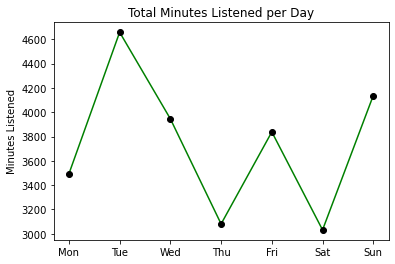

In [32]:
# Creating the graph to display minutes listened on each day

min_day = df.groupby('wkday')['minsPlayed'].sum().reindex(day)
plt.plot(min_day, color='Green', marker="o", mfc='black', mec= "k")
#mfc= 'marker face color', mec= 'marker edge color'
plt.ylabel('Minutes Listened')
plt.title('Total Minutes Listened per Day')
plt.show()

Findings: Here we can see that the user listened to music the most on Tuesday and the least on Saturdays. With this information, new music ads should be played on those days because the user is more likely to see it! 

# Goal: Top 10 Streamed Songs

In [33]:
# View the number of times each track name appears in the data
pd.value_counts(df['trackName'])

Cool                               96
Stay With Us                       83
Goosebumps                         80
Less Than Zero                     71
Daft Pretty Boys                   68
                                   ..
Graveyard                           1
Carry Me (feat. Julia Michaels)     1
Bank Account                        1
Wow.                                1
Plastic Rose                        1
Name: trackName, Length: 1674, dtype: int64

In [34]:
#Display the first 10 tracks in the "trackName" column
pd.value_counts(df['trackName']).head(10)

Cool                         96
Stay With Us                 83
Goosebumps                   80
Less Than Zero               71
Daft Pretty Boys             68
Heartbreaker                 61
Dangerous (feat. Joywave)    59
Andrew                       59
Don't Think It Over          49
Falling Apart                47
Name: trackName, dtype: int64

Bar graph Help:https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html

Text(0, 0.5, 'Count')

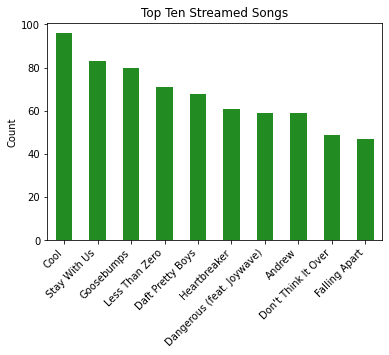

In [53]:
#Create a bar graph showing top 10 played song and times they were streamed with in the period of time
pd.value_counts(df['trackName']).head(10).plot(kind='bar',color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Top Ten Streamed Songs')
plt.ylabel('Count')


Findings: Most listened to song is 'Cool'-Knox Hamilton! With these songs in mind, Spotify may want to create an algorithm that auto-plays music in the same genres or artists for this user

# Goal: Top 20 Streamed Artists

In [36]:
#Count the times an artist was streamed 
pd.value_counts(df['artistName'])

Bad Suns         443
COIN             276
The Weeknd       244
LÉON             227
Knox Hamilton    161
                ... 
Koby Laver         1
Light Garden       1
Post Malone        1
Halsey             1
Natalie Cole       1
Name: artistName, Length: 717, dtype: int64

In [37]:
#Print the top 20 streamed artists 
pd.value_counts(df['artistName']).head(20)

Bad Suns                  443
COIN                      276
The Weeknd                244
LÉON                      227
Knox Hamilton             161
BROODS                    149
Ariana Grande             128
Florence + The Machine    126
Bastille                  110
Her's                     107
Troye Sivan               104
Emily King                 87
Seoul                      83
The Neighbourhood          76
Julia Michaels             76
Labrinth                   73
Litany                     70
Dayglow                    67
Duckwrth                   62
A R I Z O N A              61
Name: artistName, dtype: int64

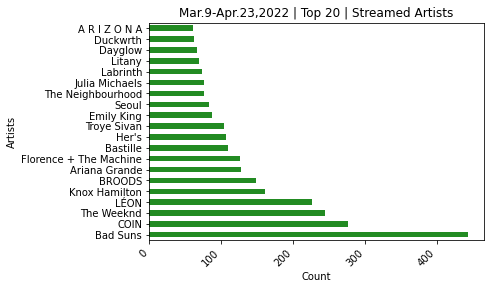

In [54]:
pd.value_counts(df['artistName']).head(20).plot(kind='barh', color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Mar.9-Apr.23,2022 | Top 20 | Streamed Artists')
plt.ylabel('Artists')
plt.xlabel('Count')
figsize=(50,50)

Findings: 'Bad Suns' is the most listened to artists! Spotify should target more of their songs or at least auto-play these songs when a playlists is finished or songs are not queued. This may expose the are user to new songs making them more likely to use the app!

-------------------------------------------------------------------------------------------------------------------------------

# Goal: How many songs are on each playlists?

In [39]:
#Import 'Playslist1' data
#playlists = pd.read_excel(r'C:\Users\15618\Downloads\WiDS Spotify Data\Playlist1.json.xlsx')
#playlists

def load_data(file):                                                    
    return pd.read_csv(file, sep = ",", index_col = False, header=0)
playlists=pd.read_excel("Playlist1.json.xlsx")
playlists

,playlists,name,lastModifiedDate,items,track,trackName,artistName,albumName,trackUri,episode,localTrack,description,numberOfFollowers
0,NaN,UF Mems,2022-04-11,NaN,NaN,Talk,Khalid,Talk,spotify:track:0rTV5WefWd1J3OwIheTzxM,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,New Light,John Mayer,Sob Rock,spotify:track:4T6FWA703h6H7zk1FoSARw,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,As It Was,Harry Styles,As It Was,spotify:track:4LRPiXqCikLlN15c3yImP7,NaN,NaN,NaN,NaN
3,NaN,Draft Pretty Boys,2021-12-18,NaN,NaN,Close To You,Dayglow,Close To You,spotify:track:4ReJJcpW8HtVnqzhf6DwNV,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,Baby Blue Shades,Bad Suns,Baby Blue Shades,spotify:track:0o4iE4nFwqY1d2JKlrcMRb,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,NaN,NaN,NaN,NaN,NaN,Renesmee's Lullaby / Something Terrible (Music...,Global Stage Orchestra,Global Stage Orchestra Performs Music from the...,spotify:track:7mVTux5KUGBLTe2NOwLLWC,NaN,NaN,NaN,NaN
510,NaN,NaN,NaN,NaN,NaN,Bella's Lullaby,Carter Burwell,Twilight - Interpretations for Piano and Violin,spotify:track:7bhub6kscykFs0ux2kSLSd,NaN,NaN,NaN,NaN
511,NaN,NaN,NaN,NaN,NaN,"Le Festin (From ""Ratatouille"")",Mark Northam,Up: Music From The Pixar Films For Solo Piano,spotify:track:7MRsdNvnVWvqqklTWf1xlW,NaN,NaN,NaN,NaN
512,NaN,NaN,NaN,NaN,NaN,Rue's Farewell,James Newton Howard,The Hunger Games: Original Motion Picture Score,spotify:track:2kAwInoNljoVi4SsYCnFeo,NaN,NaN,NaN,NaN


In [40]:
#count of values in each columns of the dataset
playlists.count()

playlists              0
name                  24
lastModifiedDate      24
items                  0
track                  0
trackName            514
artistName           514
albumName            514
trackUri             514
episode                0
localTrack             0
description            0
numberOfFollowers     24
dtype: int64

In [41]:
#cleaning the data by removing columns that do not help with the goal
playlists=playlists.drop(['playlists','items','track','episode','trackUri','localTrack','description','numberOfFollowers'], axis = 1)
playlists.count()

name                 24
lastModifiedDate     24
trackName           514
artistName          514
albumName           514
dtype: int64

In [42]:
#Listing column names
for col in playlists.columns:
    print(col)

name
lastModifiedDate
trackName
artistName
albumName


In [43]:
#print new data frame 
playlists

,name,lastModifiedDate,trackName,artistName,albumName
0,UF Mems,2022-04-11,Talk,Khalid,Talk
1,NaN,NaN,New Light,John Mayer,Sob Rock
2,NaN,NaN,As It Was,Harry Styles,As It Was
3,Draft Pretty Boys,2021-12-18,Close To You,Dayglow,Close To You
4,NaN,NaN,Baby Blue Shades,Bad Suns,Baby Blue Shades
...,...,...,...,...,...
509,NaN,NaN,Renesmee's Lullaby / Something Terrible (Music...,Global Stage Orchestra,Global Stage Orchestra Performs Music from the...
510,NaN,NaN,Bella's Lullaby,Carter Burwell,Twilight - Interpretations for Piano and Violin
511,NaN,NaN,"Le Festin (From ""Ratatouille"")",Mark Northam,Up: Music From The Pixar Films For Solo Piano
512,NaN,NaN,Rue's Farewell,James Newton Howard,The Hunger Games: Original Motion Picture Score


In [44]:
#filling in the null(NaN) values with the playlists names until the next one shows up so we can count the number of songs per playlist
playlists['name'] = playlists.name.replace(r'^\s*$', np.nan, regex=True).ffill()
playlists['name']

0                UF Mems
1                UF Mems
2                UF Mems
3      Draft Pretty Boys
4      Draft Pretty Boys
             ...        
509           Background
510           Background
511           Background
512           Background
513           Background
Name: name, Length: 514, dtype: object

In [55]:
#new data set with filled in name column
playlists

,name,lastModifiedDate,trackName,artistName,albumName
0,UF Mems,2022-04-11,Talk,Khalid,Talk
1,UF Mems,NaN,New Light,John Mayer,Sob Rock
2,UF Mems,NaN,As It Was,Harry Styles,As It Was
3,Draft Pretty Boys,2021-12-18,Close To You,Dayglow,Close To You
4,Draft Pretty Boys,NaN,Baby Blue Shades,Bad Suns,Baby Blue Shades
...,...,...,...,...,...
509,Background,NaN,Renesmee's Lullaby / Something Terrible (Music...,Global Stage Orchestra,Global Stage Orchestra Performs Music from the...
510,Background,NaN,Bella's Lullaby,Carter Burwell,Twilight - Interpretations for Piano and Violin
511,Background,NaN,"Le Festin (From ""Ratatouille"")",Mark Northam,Up: Music From The Pixar Films For Solo Piano
512,Background,NaN,Rue's Farewell,James Newton Howard,The Hunger Games: Original Motion Picture Score


In [56]:
#list of playlists names with no duplicates
playlists['name'].unique()

array(['UF Mems', 'Draft Pretty Boys', 'Daft Pretty Boys', 'One Magic',
       'Sea leaves', 'Girls Night Out', '21 Party', 'Happy',
       'Chill car playlist', 'Chillaxin', 'Hide and Seek',
       'Soft Cream Beats', "Pop Lovin'", 'Groovy Gal', 'Nice Day',
       "Disney's Poppin Tunes", 'Dark side of the moon', '1901',
       'Work it out', 'Lord, I need you!!', 'Liked from Radio',
       'Love City', "Nicole's Hits", 'Background'], dtype=object)

In [47]:
#Count the number of unique values(or playlists) in the column with the function 'nunique()' used below
playlists['name'].nunique()

24

In [48]:
#count of songs on each playlists
pd.value_counts(playlists['name'])

Background               130
Nice Day                  50
1901                      45
Liked from Radio          33
Nicole's Hits             31
Draft Pretty Boys         31
Dark side of the moon     21
Chillaxin                 21
Work it out               20
Love City                 19
Chill car playlist        15
Disney's Poppin Tunes     14
Happy                     13
Soft Cream Beats          12
Groovy Gal                12
Lord, I need you!!        11
Pop Lovin'                 6
21 Party                   6
One Magic                  6
Hide and Seek              5
Girls Night Out            5
Sea leaves                 4
UF Mems                    3
Daft Pretty Boys           1
Name: name, dtype: int64

Text(0.5, 0, 'Playlists Names')

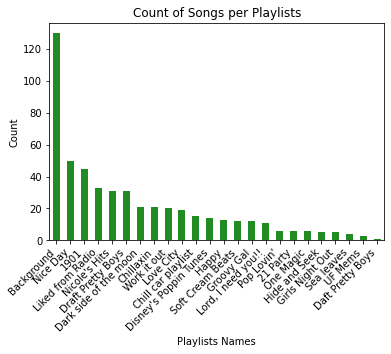

In [57]:
#Create a bar graph count of songs on each playlists
pd.value_counts(playlists['name']).plot(kind='bar',color='forestgreen')
figsize=(80,80)
plt.xticks(rotation=45, ha='right')
plt.title('Count of Songs per Playlists')
plt.ylabel('Count')
plt.xlabel('Playlists Names')

# GOAL: Timeline of the last time each playlists was modified

Fun challenge!

In [50]:
#Pull columns: "name" and "lastModifiedDate"
#Note: 'NaN' value is in the 'lastModified Date column because we did not extend the previous value like we did for the 'name' column
playlists[['name','lastModifiedDate']]

,name,lastModifiedDate
0,UF Mems,2022-04-11
1,UF Mems,NaN
2,UF Mems,NaN
3,Draft Pretty Boys,2021-12-18
4,Draft Pretty Boys,NaN
...,...,...
509,Background,NaN
510,Background,NaN
511,Background,NaN
512,Background,NaN


In [51]:
# select two columns and drop rows with NaN values in the "lastModifiedDate" column
playlists[['name','lastModifiedDate']].dropna()

,name,lastModifiedDate
0,UF Mems,2022-04-11
3,Draft Pretty Boys,2021-12-18
34,Daft Pretty Boys,2021-12-07
35,One Magic,2021-11-23
41,Sea leaves,2021-08-04
45,Girls Night Out,2021-07-08
50,21 Party,2021-11-17
56,Happy,2021-11-11
69,Chill car playlist,2021-06-08
84,Chillaxin,2020-10-20


https://dadoverflow.com/2021/08/17/making-timelines-with-python/

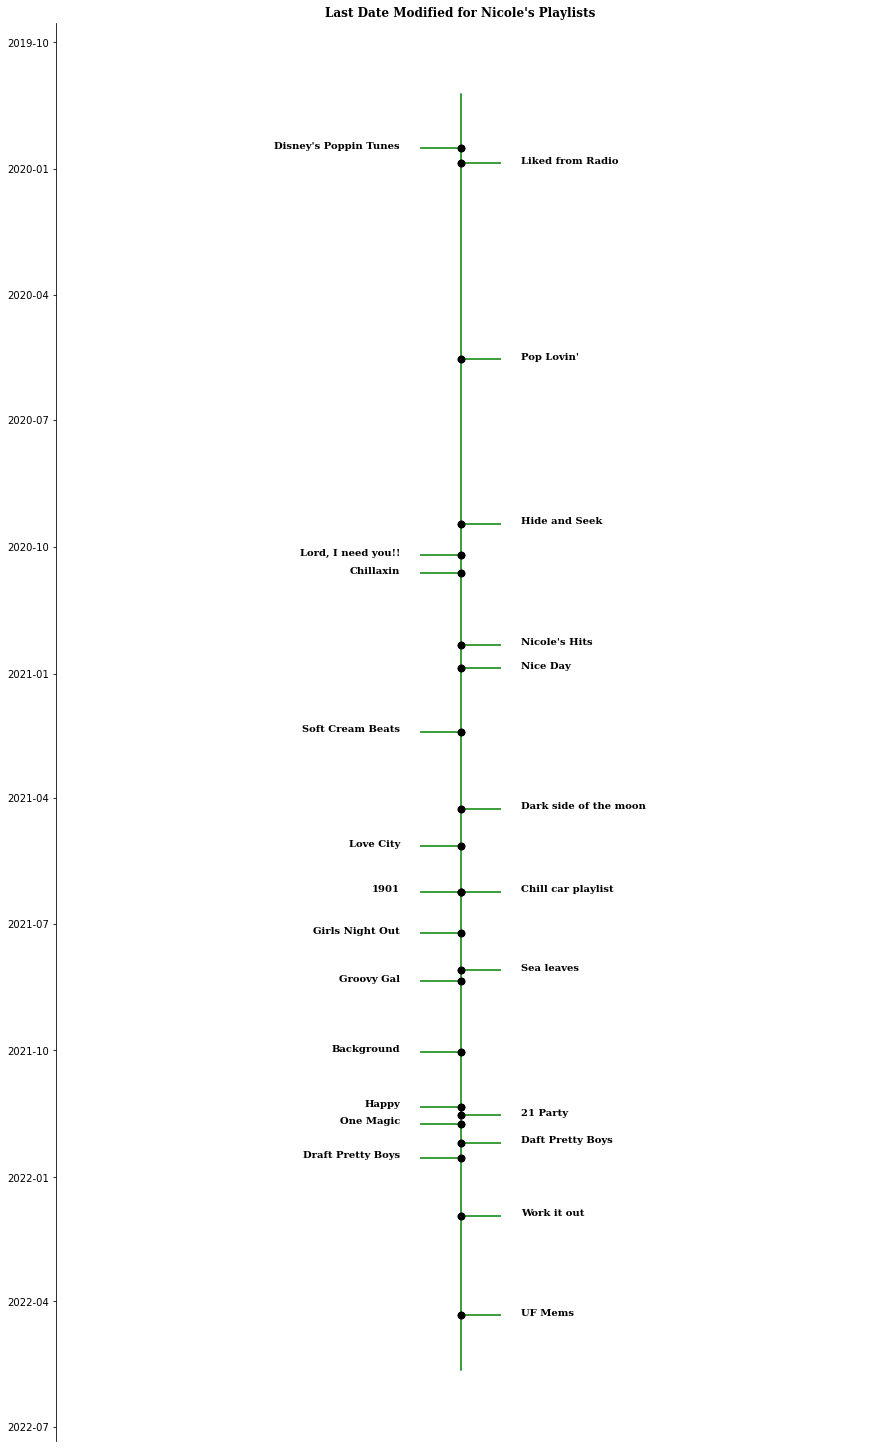

In [52]:
#packages used to execute this section
import _strptime
from datetime import timedelta

import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
 
%matplotlib inline 

#assigning a variable to the list of "lastModifiedDate" values-without null values
dates=playlists['lastModifiedDate'].dropna()
# Convert date strings (e.g. 2020-10-12) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

#editing the length of time covered on the line -displaying the timeframe plus 3 month bfore and after 
min_dates = date(np.min(dates).year, np.min(dates).month - 3, np.min(dates).day)
max_dates = date(np.max(dates).year, np.max(dates).month + 3, np.max(dates).day)

#variable assigned to playlist names
names=playlists['name'].unique()

#labels with associated dates
labels = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip (names, dates)]

fig, ax = plt.subplots(figsize=(12, 20), constrained_layout=True) #Size of the visual
_ = ax.set_xlim(-20, 20)
_ = ax.set_ylim(max_dates, min_dates)
_ = ax.axvline(0, ymin=0.05, ymax=0.95, c='green', zorder=1) #features of the vertical line
 
#dots on the vertical line
_ = ax.scatter(np.zeros(len(dates)), dates, s=45, c='black', zorder=2)
_ = ax.scatter(np.zeros(len(dates)), dates, s=45, c='black', zorder=3)

label_offsets = np.repeat(3.0, len(dates)) # left and right spacing of labels
label_offsets[1::2] = -3.0 #space between left and right labels
for i, (l, d) in enumerate(zip(names, dates)):
    d = d - timedelta(days=0) #positioning accuracy of the dates
    align = 'right'
    if i % 2 == 0:
        align = 'left'
    _ = ax.text(label_offsets[i], d, l, ha=align, fontfamily='serif', fontweight='bold', color='black',fontsize=10)
    
#more formatting
stems = np.repeat(2.0, len(dates)) #length of vertical lines
stems[1::2] *= -1.0 #length of vertical lines on the left side of the line graph  
x = ax.hlines(dates, 0, stems, color='green') # vertical lines color

# hiding the lines around the chart
for spine in ["right", "top", "bottom"]:
    _ = ax.spines[spine].set_visible(False)

# hide tick labels
_ = ax.set_xticks([]) #hiding x-axis intervals
 
#Edit the code and add your name! 
# FYI: "\'s" needs to be added when using an apostrphe otherwise python will think it's a quote
_ = ax.set_title('Last Date Modified for Nicole\'s Playlists', fontweight="bold", fontfamily='serif', fontsize=12, 
                 color='black') #color of title text